In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the hypotheses:
Ho(null): there is no difference between her ability to identify milk from tea and vice versa.

Ha(alternate): she can identify the differences in tea based on whether tea or milk was added first.

Step 2: Determine/Calculate test statistic:

The test statistic is a: hypergeometric problem.

X: the number of times she correctly chose tea first.

8 - X: the number of times she correctly chose milk first.


X = 3 (she successfully has chosen 3 teas correctly)

M: total number of things in the bucket: 8

n: 4

N: 4

Step 3: Dstribution of test statistic under Ho and compute the p-value.

In [3]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N, size=1)

# We do not see the number 3 come up a lot. The probability of getting 3 is much lower than that of getting 2.

array([2])

In [4]:
# Probability that she correctly identified 3 teas correctly (p-value)
1 - stats.hypergeom.cdf(2, M,n,N)
# Looks like about 24% of the time.

0.24285714285714288

Step 4: Conclusion: Fails to reject the null hypothesis because it is still possible for her to have guessed randomly and gotten this result. To be able to conclude differently, we would need the lady to pick from more than 8 cups (need a larger population/set of data).

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [5]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State the hypotheses:

Ho(null): the virginica species does not have a larger mean sepal width than that of versicolor. (no difference)

Ha(alternate): the virginica species does have a larger mean sepal width than that of versicolor.

Step 2: Determine/Calculate test statistic:
Difference in the sample mean between versicolor and virginica:

In [6]:
2.974-2.77

0.20400000000000018

Step 3: 
If Ho = True, we should see a bell curve around 0 (no difference -- null hypothesis)

In [8]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
iris_sub.show(10)

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [9]:
num_obs = iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

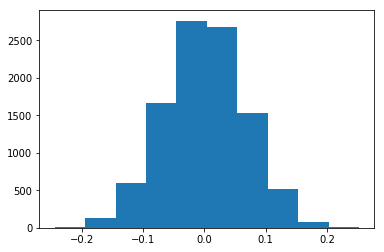

In [10]:
plt.hist(ts)
plt.show()

In [11]:
#Looking at the observed data, what is the probability that it lands within the distribution:
(sum(ts>0.204)/10000)* 100

0.08

Step 4: Conclusion: Considering that the probability of getting a value greater than 0.204 occurs less than 0.09% of the time (much less than 1%, let alone 5%), we can consider this siginificant enough to reject the null hypothesis. Hence, the virginica species does have a larger mean sepal width than that of versicolor.